Total de tensores encontrados: 432
Mostrando 5 tensores aleatorios:

✅ Other_tensor_094_S_2201.pt  →  Shape: torch.Size([4, 166, 166])
▶ Correlación:
   Diagonal → min: 1.0000 · max: 1.0000 · mean: 1.0000
▶ Mutua Info:
   Diagonal → min: 1.7611 · max: 2.2674 · mean: 2.0262
▶ Granger:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000
▶ Variabilidad:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000


/tmp/ipykernel_691241/1798550964.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load(filepath, map_location="cpu")


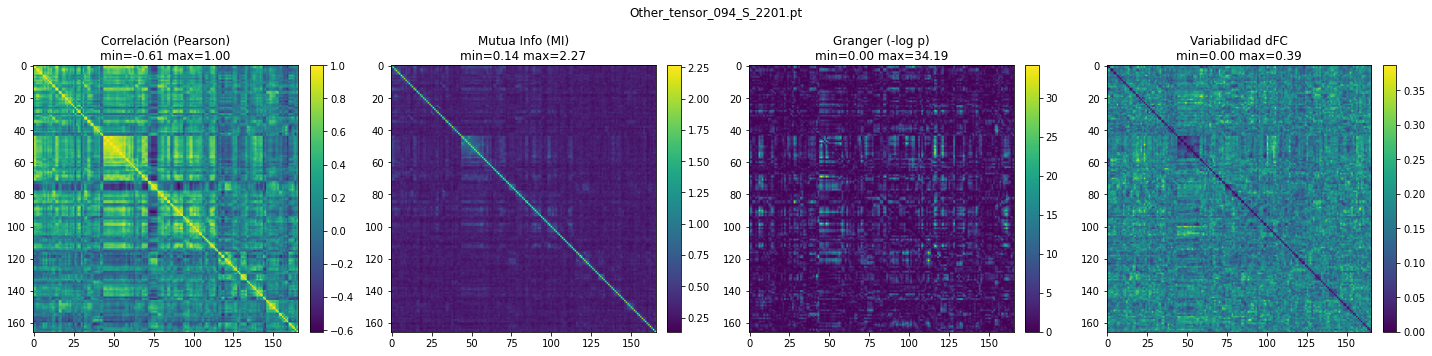


✅ CN_tensor_100_S_6578.pt  →  Shape: torch.Size([4, 166, 166])
▶ Correlación:
   Diagonal → min: 1.0000 · max: 1.0000 · mean: 1.0000
▶ Mutua Info:
   Diagonal → min: 1.3556 · max: 2.1972 · mean: 1.9400
▶ Granger:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000
▶ Variabilidad:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000


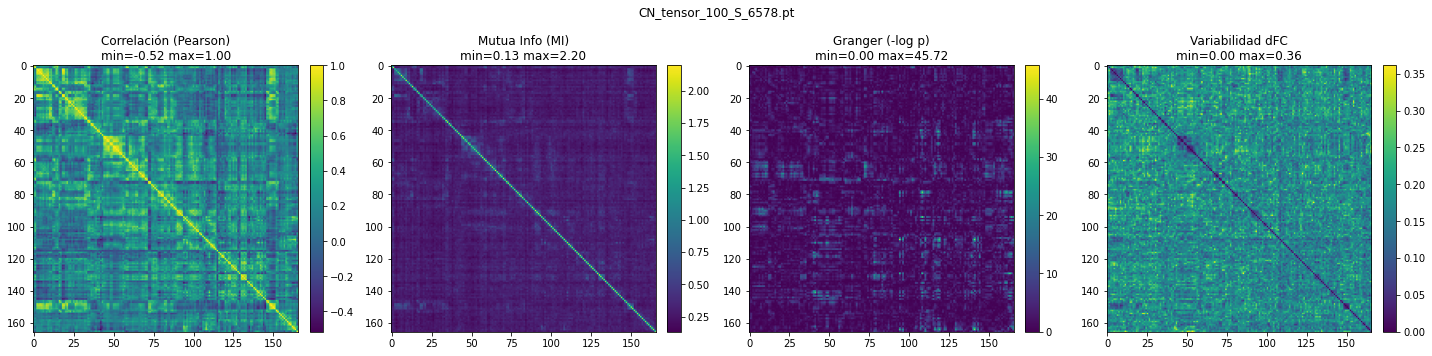


✅ CN_tensor_123_S_0106.pt  →  Shape: torch.Size([4, 166, 166])
▶ Correlación:
   Diagonal → min: 1.0000 · max: 1.0000 · mean: 1.0000
▶ Mutua Info:
   Diagonal → min: 1.7573 · max: 2.2653 · mean: 2.0348
▶ Granger:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000
▶ Variabilidad:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000


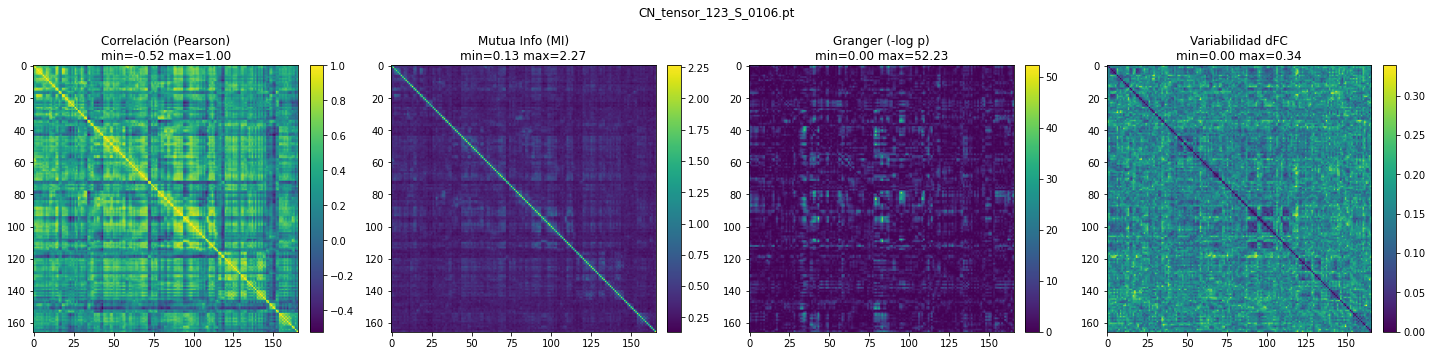


✅ AD_tensor_123_S_6825.pt  →  Shape: torch.Size([4, 166, 166])
▶ Correlación:
   Diagonal → min: 1.0000 · max: 1.0000 · mean: 1.0000
▶ Mutua Info:
   Diagonal → min: 1.5251 · max: 2.1953 · mean: 1.9611
▶ Granger:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000
▶ Variabilidad:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000


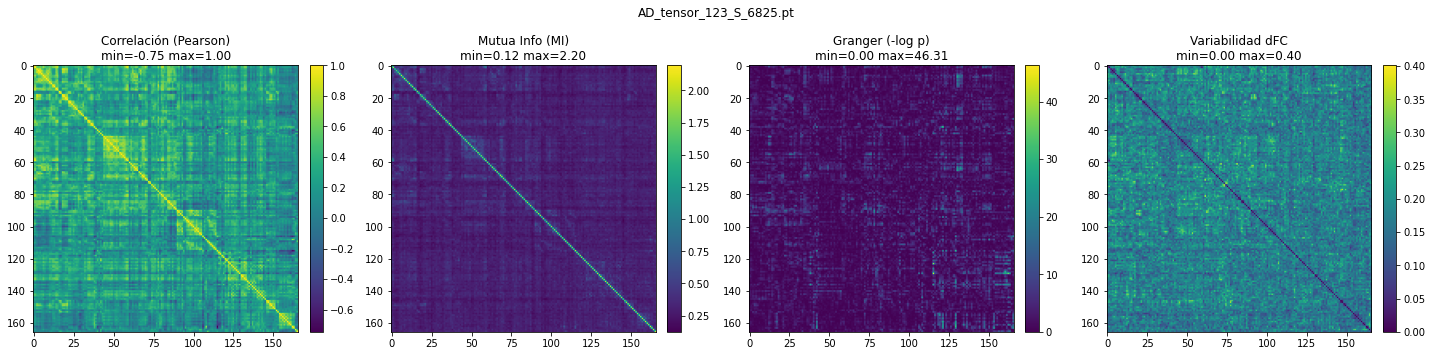


✅ Other_tensor_013_S_6725.pt  →  Shape: torch.Size([4, 166, 166])
▶ Correlación:
   Diagonal → min: 1.0000 · max: 1.0000 · mean: 1.0000
▶ Mutua Info:
   Diagonal → min: 1.6630 · max: 2.2475 · mean: 2.0348
▶ Granger:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000
▶ Variabilidad:
   Diagonal → min: 0.0000 · max: 0.0000 · mean: 0.0000


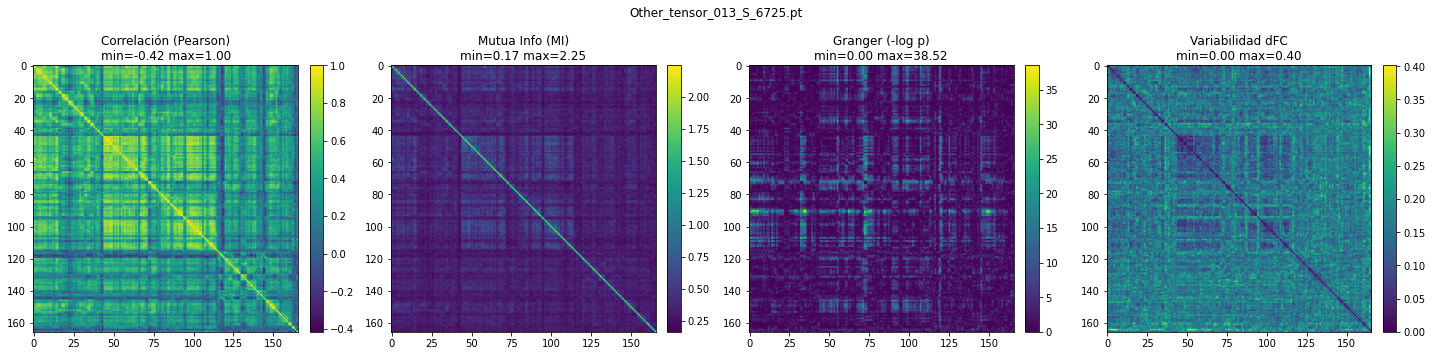


✅ Tensores analizados: 5
⚠️ Tensores con problema en correlación: 0
⚠️ Tensores con problema en Granger: 0
🎯 Tensores sin problemas: 5


In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Verificación rápida de tensores conectivos (4 × ROI × ROI) + chequeo de diagonales + resumen final.
Autor: ChatGPT · 2025-04-27
"""

import os, random, torch
import matplotlib.pyplot as plt
import numpy as np

# ---------- 1 · Parámetros ----------
output_dir = "/home/diego/Escritorio/GrandMeanNorm/TensorData"   # Modificar si es otro
n_samples  = 5   # Número de tensores aleatorios a verificar

# ---------- 2 · Listar archivos ----------
files = [f for f in os.listdir(output_dir) if f.endswith(".pt")]

if not files:
    raise RuntimeError("No se encontraron archivos .pt en la carpeta de salida.")

print(f"Total de tensores encontrados: {len(files)}")
selected_files = random.sample(files, min(n_samples, len(files)))
print(f"Mostrando {len(selected_files)} tensores aleatorios:")

# ---------- 3 · Variables de conteo ----------
total_checked = 0
correlation_issues = 0
granger_issues = 0

# ---------- 4 · Funciones ----------
def plot_tensor(tensor, title):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    names = ["Correlación (Pearson)", "Mutua Info (MI)", "Granger (-log p)", "Variabilidad dFC"]

    for i in range(4):
        mat = tensor[i].numpy()
        im = axes[i].imshow(mat, cmap="viridis", aspect="auto")
        axes[i].set_title(f"{names[i]}\nmin={mat.min():.2f} max={mat.max():.2f}")
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def analyze_diagonals(tensor):
    global correlation_issues, granger_issues

    names = ["Correlación", "Mutua Info", "Granger", "Variabilidad"]
    for idx in range(4):
        mat = tensor[idx].numpy()
        diag = np.diag(mat)

        print(f"▶ {names[idx]}:")
        print(f"   Diagonal → min: {diag.min():.4f} · max: {diag.max():.4f} · mean: {diag.mean():.4f}")

        if idx == 0:  # Correlación
            if not np.allclose(diag, 1.0, atol=0.05):
                print("   ⚠️  Alerta: Diagonal de correlación lejos de 1")
                correlation_issues += 1
        elif idx == 2:  # Granger
            if not np.allclose(diag, 0.0, atol=1e-2):
                print("   ⚠️  Alerta: Diagonal de Granger no es ~0")
                granger_issues += 1

# ---------- 5 · Loop de verificación ----------
for filename in selected_files:
    filepath = os.path.join(output_dir, filename)
    try:
        tensor = torch.load(filepath, map_location="cpu")
    except Exception as e:
        print(f"❌ Error cargando {filename}: {e}")
        continue

    if tensor.shape[0] != 4 or tensor.shape[1] != tensor.shape[2]:
        print(f"⚠️ Tensor {filename} tiene shape raro: {tensor.shape}")
        continue

    print(f"\n✅ {filename}  →  Shape: {tensor.shape}")

    total_checked += 1
    analyze_diagonals(tensor)
    plot_tensor(tensor, title=filename)

# ---------- 6 · Resumen final ----------
print("\n" + "="*40)
print(f"✅ Tensores analizados: {total_checked}")
print(f"⚠️ Tensores con problema en correlación: {correlation_issues}")
print(f"⚠️ Tensores con problema en Granger: {granger_issues}")
print(f"🎯 Tensores sin problemas: {total_checked - (correlation_issues + granger_issues)}")
print("="*40)

